In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
df = df.drop(["Person ID"],axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [6]:
label_encoder = LabelEncoder()

# Encode 'BMI Category' and drop the original column
df['BMI Category Encoded'] = label_encoder.fit_transform(df['BMI Category'])
df.drop('BMI Category', axis=1, inplace=True)

# Encode 'Blood Pressure' and drop the original column
df['Blood Pressure Encoded'] = label_encoder.fit_transform(df['Blood Pressure'])
df.drop('Blood Pressure', axis=1, inplace=True)

# Encode 'Sleep Disorder' and drop the original column
df['Sleep Disorder Encoded'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.drop('Sleep Disorder', axis=1, inplace=True)

# Encode 'Gender' and drop the original column
df['Gender Encoded'] = label_encoder.fit_transform(df['Gender'])
df.drop('Gender', axis=1, inplace=True)
# Encode 'Gender' and drop the original column
df['Occupation Encoded'] = label_encoder.fit_transform(df['Occupation'])
df.drop('Occupation', axis=1, inplace=True)
df.head()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category Encoded,Blood Pressure Encoded,Sleep Disorder Encoded,Gender Encoded,Occupation Encoded
0,27,6.1,6,42,6,77,4200,3,11,2,1,9
1,28,6.2,6,60,8,75,10000,0,9,2,1,1
2,28,6.2,6,60,8,75,10000,0,9,2,1,1
3,28,5.9,4,30,8,85,3000,2,22,1,1,6
4,28,5.9,4,30,8,85,3000,2,22,1,1,6


In [7]:
# Drop the columns with multicollineart according to vif value
X = df.drop(["Stress Level"], axis=1)
X.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,BMI Category Encoded,Blood Pressure Encoded,Sleep Disorder Encoded,Gender Encoded,Occupation Encoded
0,27,6.1,6,42,77,4200,3,11,2,1,9
1,28,6.2,6,60,75,10000,0,9,2,1,1
2,28,6.2,6,60,75,10000,0,9,2,1,1
3,28,5.9,4,30,85,3000,2,22,1,1,6
4,28,5.9,4,30,85,3000,2,22,1,1,6


In [8]:
# Selecting only the numerical variables for VIF calculation
numerical_vars = X.select_dtypes(include='number')

# Calculating VIF for each numerical variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                   Variable         VIF
0                       Age  155.913856
1            Sleep Duration  466.302406
2          Quality of Sleep  299.566844
3   Physical Activity Level   32.481133
4                Heart Rate  113.777258
5               Daily Steps   51.347787
6      BMI Category Encoded   10.962997
7    Blood Pressure Encoded   17.141151
8    Sleep Disorder Encoded    9.829871
9            Gender Encoded    3.915459
10       Occupation Encoded    6.459966


In [9]:
# Select the variables with high VIF values
variables_to_check = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps',"BMI Category Encoded","Blood Pressure Encoded"]

# Calculate pairwise correlation coefficients
correlation_matrix = df[variables_to_check].corr()

# Print the correlation matrix
print(correlation_matrix)


                         Sleep Duration  Quality of Sleep  \
Sleep Duration                 1.000000          0.883213   
Quality of Sleep               0.883213          1.000000   
Physical Activity Level        0.212360          0.192896   
Heart Rate                    -0.516455         -0.659865   
Daily Steps                   -0.039533          0.016791   
BMI Category Encoded          -0.376358         -0.312562   
Blood Pressure Encoded        -0.191704         -0.147769   

                         Physical Activity Level  Heart Rate  Daily Steps  \
Sleep Duration                          0.212360   -0.516455    -0.039533   
Quality of Sleep                        0.192896   -0.659865     0.016791   
Physical Activity Level                 1.000000    0.136971     0.772723   
Heart Rate                              0.136971    1.000000    -0.030309   
Daily Steps                             0.772723   -0.030309     1.000000   
BMI Category Encoded                    0.077156 

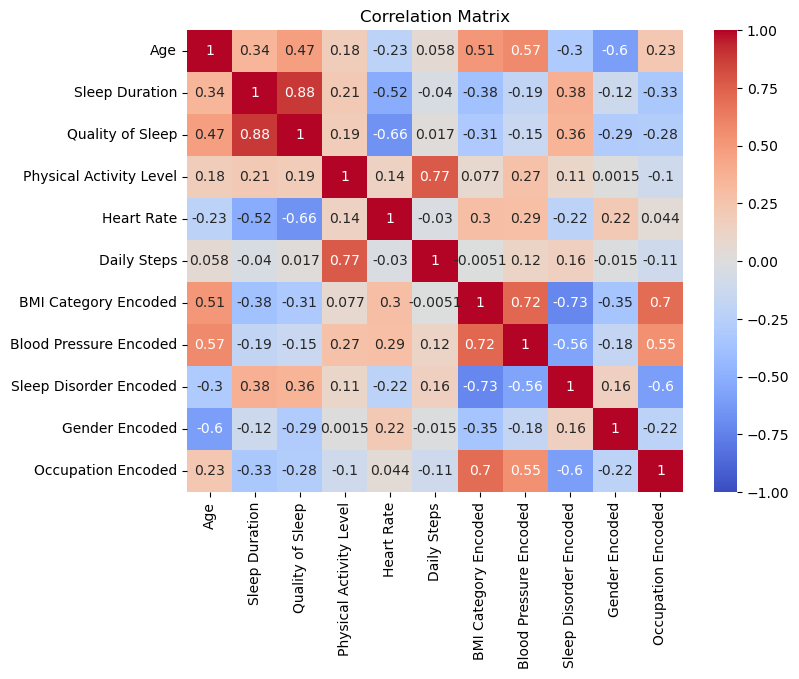

In [10]:

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


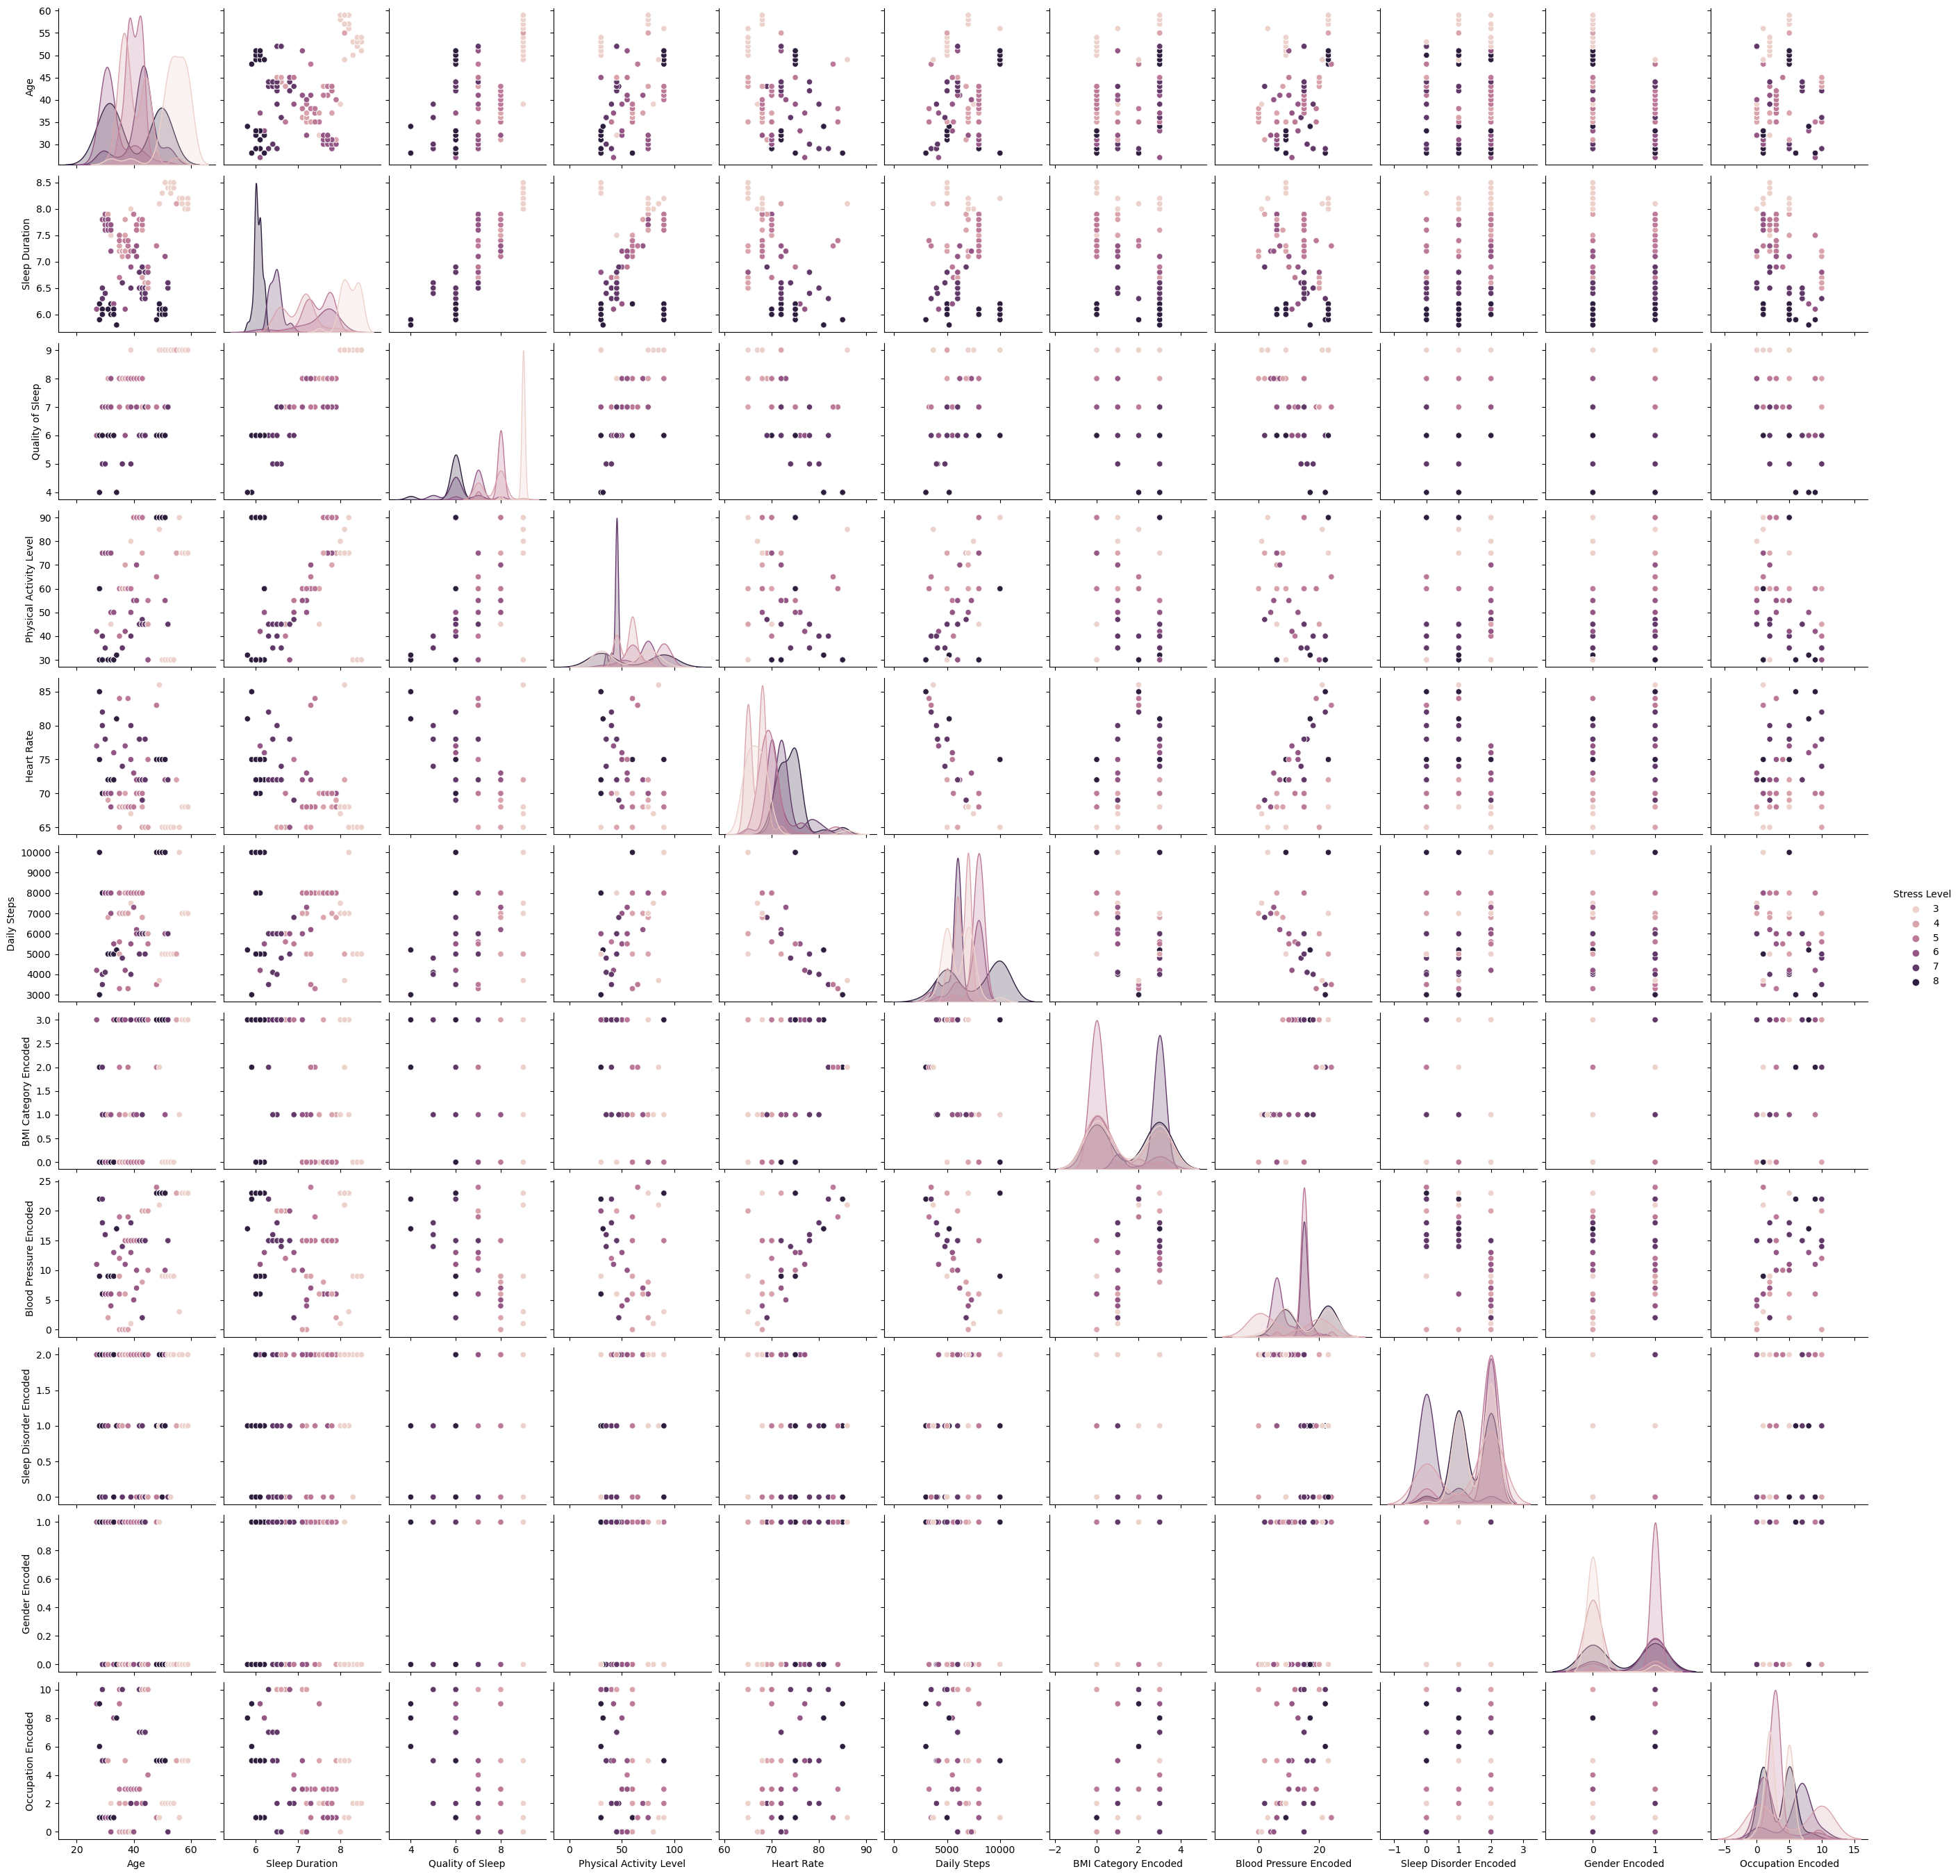

In [11]:
sns.pairplot(df,hue='Stress Level')

In [12]:

# Drop the columns with multicollineart according to vif value
X = df.drop(["Stress Level","Physical Activity Level"], axis=1)
y = df['Stress Level']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =20)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_scaled)
model.coef_


array([ 0.58832604, -0.42380867, -1.49059839,  0.19236645,  0.27900038,
       -0.19685261, -0.05067555,  0.14257639,  0.3802488 , -0.29892606])

In [18]:
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.2625876918927017


In [19]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.14611526700015476


In [20]:
# Calculate R-squared (coefficient of determination)
R2 = model.score(X_test_scaled, y_test)
print("R-squared (R2):", R2)

R-squared (R2): 0.9475514096842148


In [21]:
# indicate weather the model is overstimate or understimate
residual = y_test -y_pred
value_resudal = np.sum(residual)
print(value_resudal)

2.847976018638338


In [22]:
# Calculate RSE
rse = np.sqrt(np.mean(residual**2))

# Print RSE
print("Residual standard error (RSE):", rse)

Residual standard error (RSE): 0.3822502674952037


/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


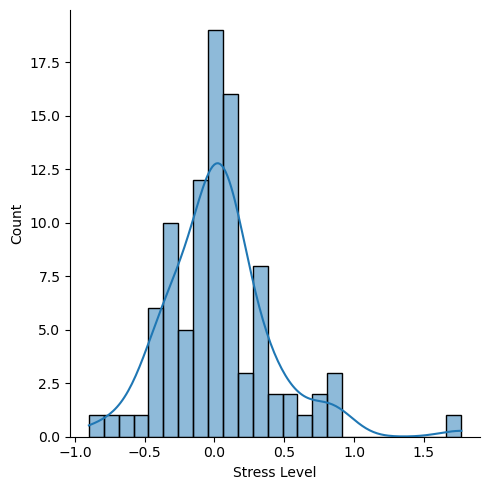

In [23]:
sns.displot(residual, bins = 25, kde = True)

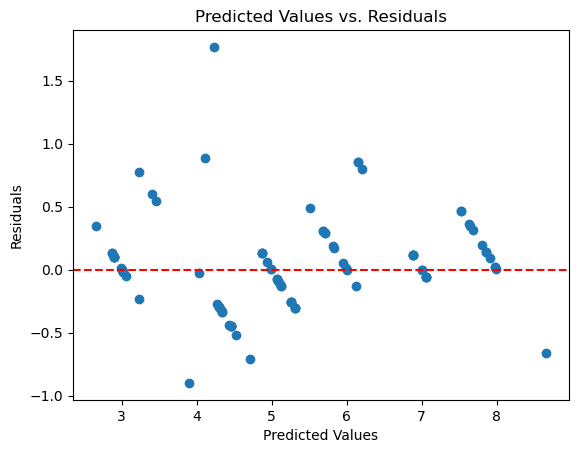

In [24]:
# Plot predicted values versus residuals
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.show()

In [60]:
# regularization
model = Ridge(alpha=0.001)  
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1461172814854078


In [71]:
# Predicting on new data as an example
X_test = np.array([[57,7,6.7,9,3,5,1,1,3,1]])  
X_test_scaled = scaler.transform(X_test)
y_pred_new = model.predict(X_test_scaled)

print("Predicted stress level:", y_pred_new)

Predicted stress level: [4.96397468]


/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
